# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [3]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [1]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01','02','03','04','05','06']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [2]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [3]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


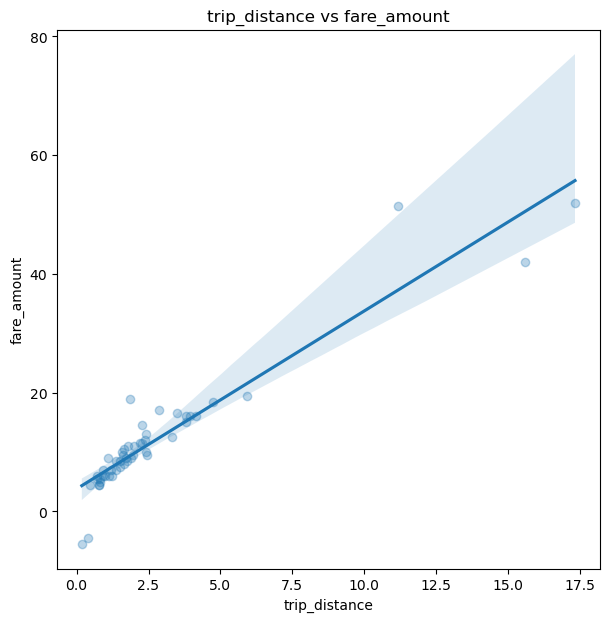

In [4]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)


### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

In [5]:
#Makes summary of yellow dataset dataset: 
df_yellow.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.981758e+07,1.914568e+07,1.981758e+07,1.914568e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.981758e+07,1.914568e+07,1.914568e+07
mean,1.713360e+00,1.396736e+00,5.945396e+00,1.406460e+00,1.650115e+02,1.628957e+02,1.183228e+00,1.424568e+01,1.018474e+00,4.901798e-01,2.662276e+00,4.954867e-01,2.965172e-01,2.090277e+01,2.291212e+00,8.946397e-02
std,4.948604e-01,9.723353e-01,6.063143e+02,5.723299e+00,6.550294e+01,7.029948e+01,5.026529e-01,1.278727e+02,1.248377e+00,8.713217e-02,3.183075e+00,1.969530e+00,4.518930e-02,1.282713e+02,7.329083e-01,3.248978e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.564000e+03,-7.000000e+00,-5.000000e-01,-4.100000e+02,-8.300000e+01,-3.000000e-01,-2.567800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.200000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.870000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.150000e+00,0.000000e+00,3.000000e-01,1.551000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.460000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.260000e+00,0.000000e+00,3.000000e-01,2.225000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.710000e+01,1.400160e+03,9.118700e+02,3.000000e-01,4.010956e+05,2.750000e+00,1.250000e+00


In [6]:
#Make summary of green dataset
df_green.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,437176.000000,386760.000000,437176.000000,437176.000000,386760.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,437176.000000,386760.000000,386754.00000,386760.000000
mean,1.855706,1.203242,99.918934,137.605738,1.278917,92.988147,14.755748,0.347963,0.419242,1.949094,0.243981,0.297385,18.671302,1.381872,1.04266,0.729586
std,0.351427,0.947528,64.027211,76.835996,0.908927,3311.892283,13.026730,0.653121,0.187675,3.271234,1.331436,0.035236,15.027967,0.504943,0.20209,1.214278
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-165.000000,-4.500000,-0.500000,-2.080000,-6.550000,-0.300000,-165.300000,1.000000,1.00000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.140000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.960000,1.000000,1.00000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.000000,11.000000,0.000000,0.500000,1.330000,0.000000,0.300000,14.750000,1.000000,1.00000,0.000000
75%,2.000000,1.000000,130.000000,216.000000,1.000000,3.770000,17.830000,0.500000,0.500000,2.940000,0.000000,0.300000,22.330000,2.000000,1.00000,2.750000
max,5.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,604.500000,4.500000,3.550000,450.000000,57.700000,0.300000,605.300000,5.000000,2.00000,2.750000


### Summary
The Yellow taxis conducts a lot more trips, than the green once. Futhermore, it looks like the mean of trip distance is higher for green taxis, then for yellow taxis. 
Futhermore, it is needed to clean up the data as it seems there are errors in the dataset, as seen in the max value of trip distance for both green and yellow taxis, and the max fare amount for yellow taxis. 

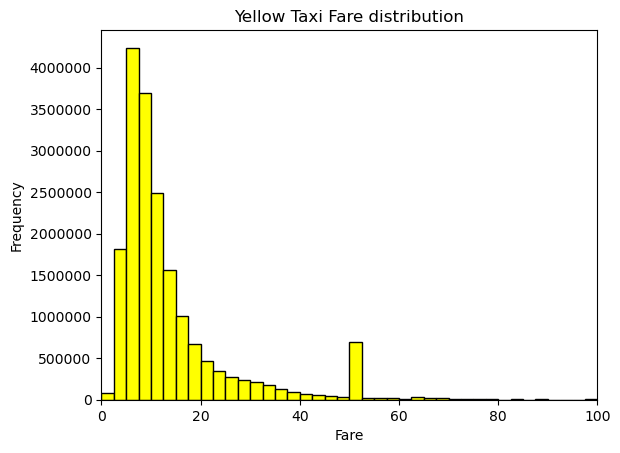

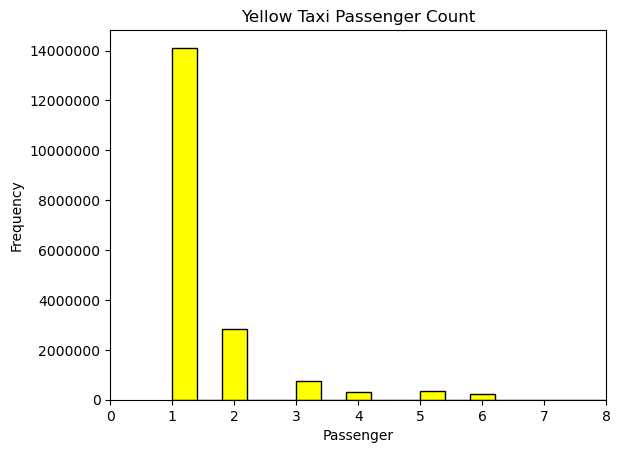

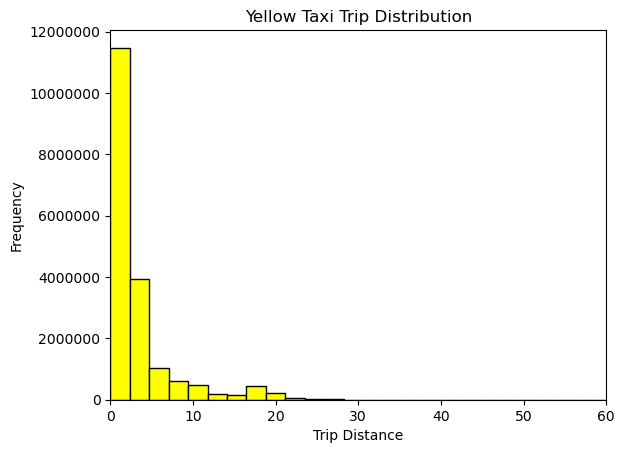

In [7]:
# Write your code
import matplotlib.pyplot as plt
import pandas as pd
from src.histogram import plot_histogram
from src.utils import create_scatterplot


#Yellow Taxis
#Firstly we will drop rows with na values: 
df_yellow = df_yellow.dropna()
#Excludes negativ fare amount + over 500 dollars
#Excludes trip distance over 500 miles
df_yellow =  df_yellow[(df_yellow["fare_amount"]<=500) & (df_yellow["fare_amount"]>0) & (df_yellow["trip_distance"] <=500)
                      & (df_yellow['passenger_count'] > 0)]

#Plots distribution of fare amount with limit of 100 dollars
plt.subplot(1,1,1)
plot_histogram(df_yellow["fare_amount"], 
               bins = 200, 
               title = "Yellow Taxi Fare distribution", 
               xmin = 0, 
               xmax = 100, 
               xlabel = "Fare", 
               color = "yellow"
               )

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_yellow["passenger_count"], 
               bins = 20, 
               title = "Yellow Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "yellow"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_yellow["trip_distance"], 
               bins = 200, 
               title = "Yellow Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "yellow"
               )

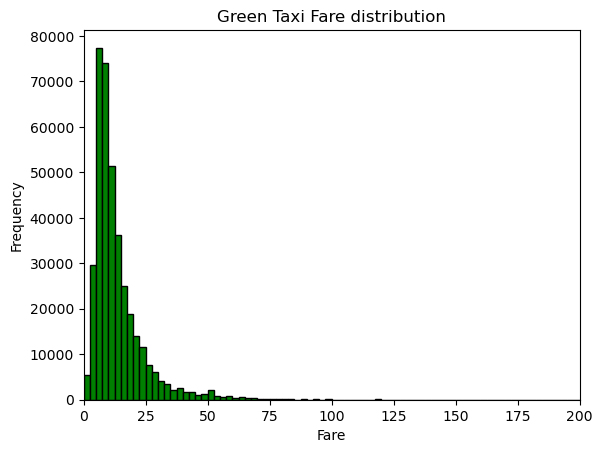

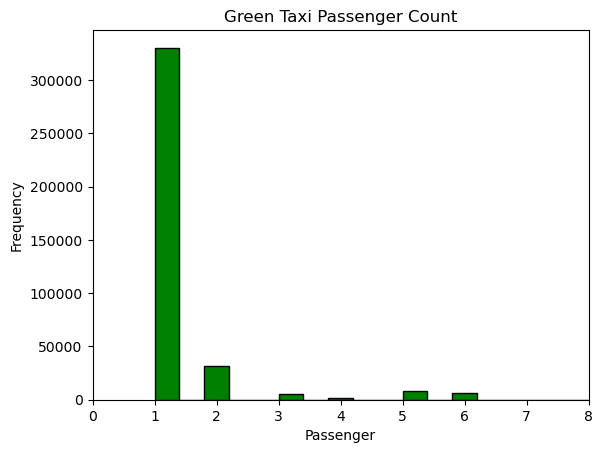

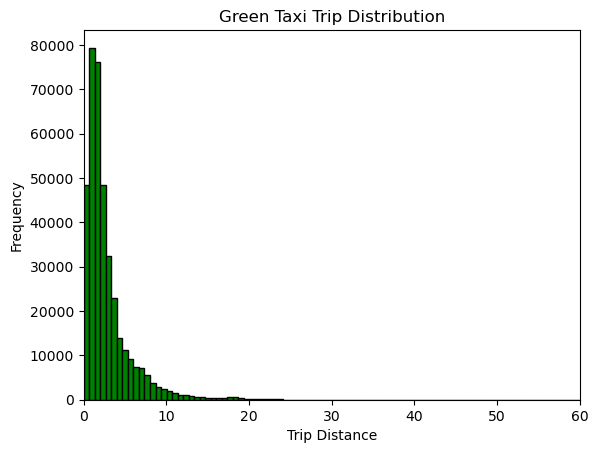

In [8]:
#Green Taxis

#Firstly we will drop the coloumn "ehail_fee" as these values are all None, and can cause problems: 
df_green = df_green.drop('ehail_fee', axis=1)
#Afterward we will drop na values: 
df_green = df_green.dropna()
df_green = df_green[(df_green["fare_amount"]<=500) & (df_green["fare_amount"]>0) & (df_green["trip_distance"] <=500) &
                    (df_green['passenger_count'] > 0)]

plot_histogram(df_green["fare_amount"], bins = 200, title = "Green Taxi Fare distribution", xmin = 0, xmax = 200, xlabel = "Fare", color = "green")

#Plots distrubution of passenger count with limit of 
plt.subplot(1,1,1)
plot_histogram(df_green["passenger_count"], 
               bins = 20, 
               title = "Green Taxi Passenger Count", 
               xmin = 0, 
               xmax = 8, 
               xlabel = "Passenger", 
               color = "green"
               )

#Plots distrubution of trip distance with max x-value of 50 miles
plt.subplot(1,1,1)
plot_histogram(df_green["trip_distance"], 
               bins = 200, 
               title = "Green Taxi Trip Distribution", 
               xmin = 0, 
               xmax = 60, 
               xlabel = "Trip Distance", 
               color = "green"
               )

## Summary
Both the yellow and the green taxis shares the same distribution of trip distance, however the yellow taxis conducts fare greater amounts of trips. 

It also seems that there is a little assumption in the data that the green taxis has fewer trips with more than 1 passenger. 

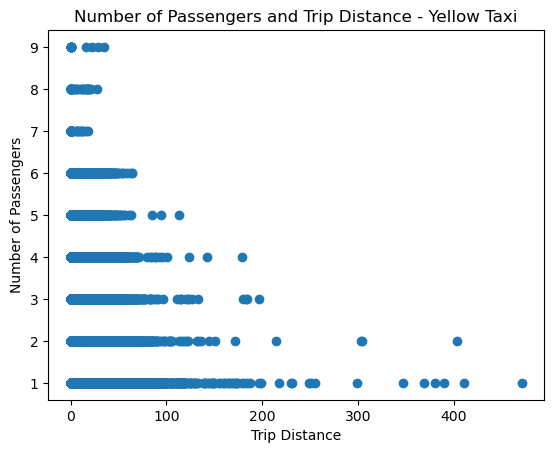

In [9]:
import matplotlib.pyplot as plt
# Finds correlation between trips distance and passenger count:

# Create the scatter plot
plt.scatter(df_yellow['trip_distance'], df_yellow['passenger_count'])

# Set plot title and labels
plt.title('Number of Passengers and Trip Distance - Yellow Taxi')
plt.xlabel('Trip Distance')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

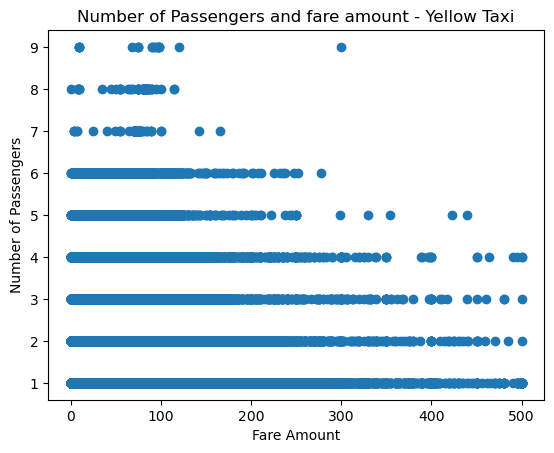

In [10]:
# Finds correlation between fare amount and the passenger count

# Create the scatter plot
plt.scatter(df_yellow['fare_amount'], df_yellow['passenger_count'])

# Set plot title and labels
plt.title('Number of Passengers and fare amount - Yellow Taxi')
plt.xlabel('Fare Amount')
plt.ylabel('Number of Passengers')

# Display the plot
plt.show()

## Summary
It seems that there are no real correlation between number of passengers and the trip distance and fare amount. 
There are however a strong correlation between fare amount and trip distance, which makes sense since the fare amount increases as the trip distance becomes greater.

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [11]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


### Task 3: Explaination
The spatial maps has been made with kepler.gl. Since we couldn't find a way to make the map initialize the same way we made them, then the maps has been saved as a HTML, and can be opened through the webbrowser through the code block below. The html files are located in the /src folder
The maps are the following: 

**DO_Green.html** = The dropoff clusters of the green taxis

**PU_Green.html** = The pickup clusters of the green taxis

**DO_Yellow.html** = The dropoff clusters of the yellow taxis

**PU_Yellow.html** = the pickup clusters of the yellow taxis

Below this code block is also the rest of the code used to make data and the maps, but since the maps reinitialize each time they are run, then kepler will display an empty map. Please note that the yellow taxis has been limited to a sample of 100.000 because of memory limitations.

In [7]:
#Open the maps in webbrowser for interaction:
import webbrowser
import os

# Get the current working directory
current_dir = os.getcwd()

# Specifies the path to the src folder
relative_path = 'src/'
# Specifies path to each map
html_path_DO_Yellow = os.path.join(current_dir, relative_path + '/DO_Yellow.html')
html_path_PU_Yellow = os.path.join(current_dir, relative_path + '/PU_Yellow.html')
html_path_DO_Green = os.path.join(current_dir, relative_path + '/DO_Green.html')
html_path_PU_Green = os.path.join(current_dir, relative_path + '/PU_Green.html')
# Open the HTML file in a new browser tab
webbrowser.open_new_tab(html_path_DO_Yellow)
webbrowser.open_new_tab(html_path_PU_Yellow)
webbrowser.open_new_tab(html_path_DO_Green)
webbrowser.open_new_tab(html_path_PU_Green)

True

In [ ]:
#Install nessecary packages if needed:
!pip install keplergl
!pip install pandas geopandas

In [10]:
# Write your code
import pandas as pd
# The following two code block merges the pickup and dropoff locations with the df_zones for 
# green and yellow taxis. 

#Yellow pickup:
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_yellow = df_yellow.drop("LocationID", axis = 1)


#Yellow dropoff: 
df_yellow = pd.merge(
                               df_yellow, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_yellow = df_yellow.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_yellow = df_yellow.drop("LocationID", axis = 1)
df_yellow = df_yellow.dropna()

In [11]:
#Green pickup:
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='PULocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_PU','lng': 'lng_PU'})
df_green = df_green.drop("LocationID", axis = 1)


#Green dropoff: 
df_green = pd.merge(
                               df_green, 
                               df_zones[['LocationID', 'lat', 'lng']], 
                               left_on='DOLocationID', 
                               right_on='LocationID', 
                               how='left'
                               )
df_green = df_green.rename(columns={'lat': 'lat_DO', 'lng': 'lng_DO'})
df_green = df_green.drop("LocationID", axis = 1)
df_green = df_green.dropna()

In [ ]:
#Making yellow maps:
import geopandas as gpd
from keplergl import KeplerGl

#Yellow pickup:
Yellow_PU = KeplerGl(Height = 500)
Yellow_PU.add_data(
    data = df_yellow[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']].sample(100000), 
    name = "Yellow Taxi Pickup")
Yellow_PU

In [ ]:
#Yellow Dropoff
Yellow_DO = KeplerGl(Height = 500)
Yellow_DO.add_data(
    data = df_yellow[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']].sample(100000), 
    name = "Yellow Taxi Dropoff")
Yellow_DO

In [ ]:
Yellow_PU.save_to_html(file_name='PU_Yellow.html')
Yellow_DO.save_to_html(file_name='DO_Yellow.html')

In [ ]:
#Making green maps:
import geopandas as gpd
from keplergl import KeplerGl

#Green pickup:
Green_PU = KeplerGl(Height = 500)
Green_PU.add_data(
    data = df_green[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']], 
    name = "Green Taxi Pickup")
Green_PU

In [ ]:
#Green pickup:
Green_DO = KeplerGl(Height = 500)
Green_DO.add_data(
    data = df_green[['lat_PU', 'lng_PU', 'lat_DO', 'lng_DO']], 
    name = "Green Taxi Dropoff")
Green_DO

In [ ]:
Green_PU.save_to_html(file_name='PU_Green.html')
Green_DO.save_to_html(file_name='DO_Green.html')

## Summary
The yellow taxis has more clusters inside the center of New York, while the clusters of green taxis also sits inside the center of the city, but also the outskirts outside the city. 

This could mean that the amount of green taxis are greater outside of the city, and that the yellow taxis only services the center of the city. 

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

In [12]:
#Split date to use in analysis

#Imports custom function
from src.utils import split_date

# The custom function splits the date into 3 columns: 
# 1: The Hour of the day
# 2: The Day of the week
# 3: The month of the year
split_date(df_yellow, 'tpep_pickup_datetime')
split_date(df_green, 'lpep_pickup_datetime')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,lat_PU,lng_PU,lat_DO,lng_DO,Hour,DayOfWeek,Month
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,2.0,1.0,0.00,40.821046,-73.939516,40.821046,-73.939516,0,Saturday,January
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,2.0,1.0,0.00,40.827535,-73.947368,40.804205,-73.952065,0,Saturday,January
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,1.0,1.0,2.75,40.804205,-73.952065,40.765507,-73.954568,0,Saturday,January
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,2.0,1.0,0.00,40.672019,-73.979045,40.672019,-73.979045,0,Saturday,January
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,1.0,1.0,2.75,40.696238,-73.995329,40.747654,-73.976942,0,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385335,2,2022-06-30 23:13:26,2022-06-30 23:23:15,N,1.0,95,95,1.0,1.61,8.5,...,1.0,1.0,0.00,40.723465,-73.848220,40.723465,-73.848220,23,Thursday,June
385336,2,2022-06-30 23:32:54,2022-06-30 23:37:51,N,5.0,95,95,1.0,1.13,14.0,...,1.0,2.0,0.00,40.723465,-73.848220,40.723465,-73.848220,23,Thursday,June
385337,2,2022-06-30 23:13:17,2022-06-30 23:22:23,N,1.0,95,135,1.0,1.95,8.5,...,1.0,1.0,0.00,40.723465,-73.848220,40.729410,-73.823986,23,Thursday,June
385338,2,2022-06-30 23:13:18,2022-06-30 23:25:28,N,5.0,69,235,1.0,2.00,14.0,...,2.0,2.0,0.00,40.830608,-73.915366,40.853503,-73.914968,23,Thursday,June


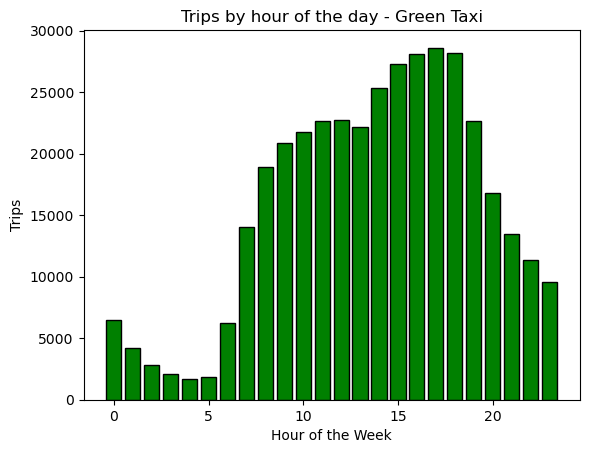

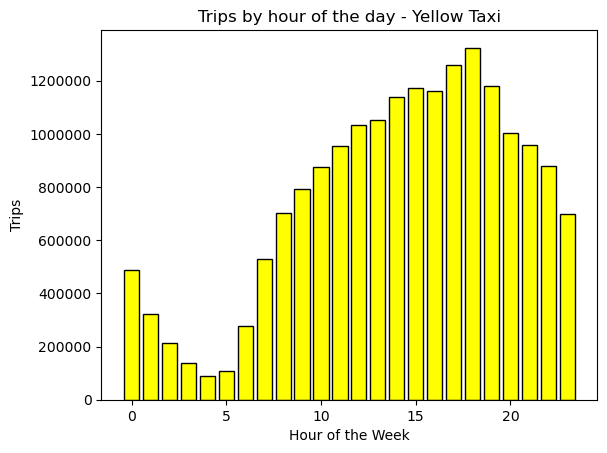

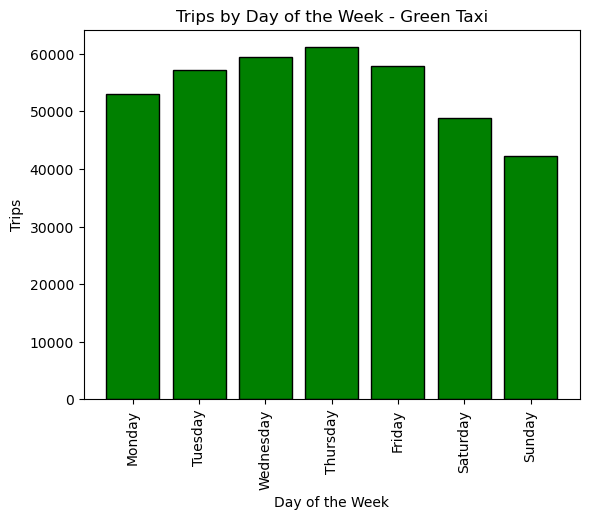

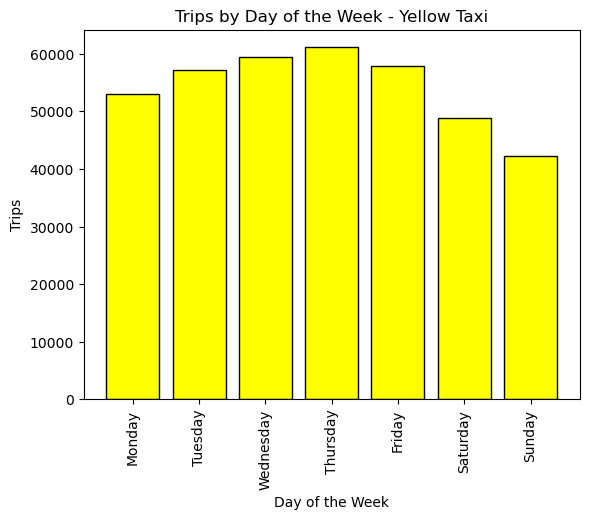

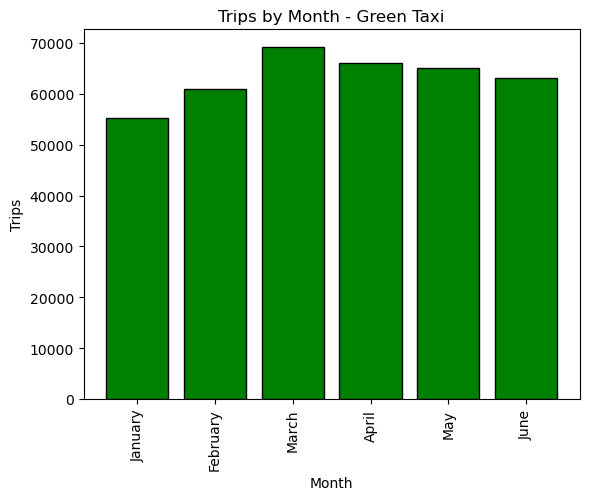

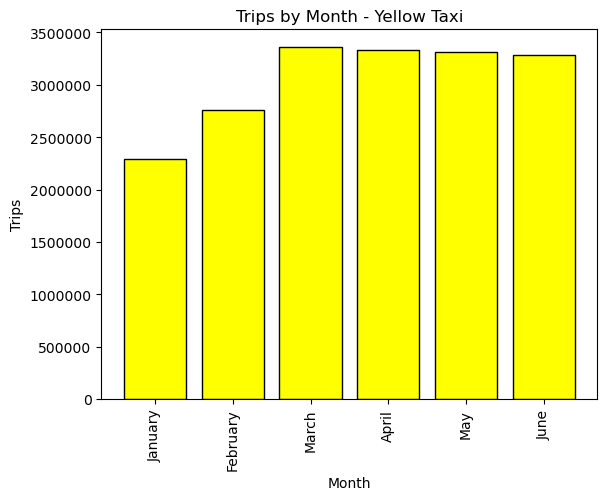

In [13]:
#Making visual representation of the temporal analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.utils import PlotBarChart
from src.utils import chronological_order_days
from src.utils import chronological_order_month

#The method for creating the plots below are the same for all plots: 
# 1: Count the number of occurances for the time format (hour, day, month)
# 1a: Sort the days and month chronologically using the list from /scr.utils. Only used with days and months
# 2: Use the custom bar chart function. 

#Hour
#Green Taxi
counts_green_hour = df_green.groupby('Hour')['Hour'].count()
PlotBarChart(counts_green_hour, 
             'Trips by hour of the day - Green Taxi', 
             'Hour of the Week', 
             'Trips', 
             0, 
             'green')

#Yellow
counts_yellow_hour = df_yellow.groupby('Hour')['Hour'].count()
PlotBarChart(counts_yellow_hour, 
             'Trips by hour of the day - Yellow Taxi', 
             'Hour of the Week', 
             'Trips', 
             0, 
             'yellow')


#Day
#Green Taxi
counts = df_green.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
PlotBarChart(sorted_counts, 
             'Trips by Day of the Week - Green Taxi', 
             'Day of the Week', 
             'Trips', 
             90, 
             'green')

#Yellow Taxi - Trips pr. day of the week
counts = df_yellow.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
counts = df_green.groupby('DayOfWeek')['DayOfWeek'].count()
sorted_counts = counts.loc[chronological_order_days]
PlotBarChart(sorted_counts, 
             'Trips by Day of the Week - Yellow Taxi', 
             'Day of the Week', 
             'Trips', 
             90, 
             'yellow')

#Months
#Green Taxi
counts = df_green.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]
PlotBarChart(sorted_counts, 
             'Trips by Month - Green Taxi', 
             'Month', 
             'Trips', 
             90, 
             'green')
#Yellow
counts = df_yellow.groupby('Month')['Month'].count()
sorted_counts = counts.loc[chronological_order_month]
PlotBarChart(sorted_counts, 
             'Trips by Month - Yellow Taxi', 
             'Month', 
             'Trips', 
             90, 
             'yellow')


## Summary
Most of the trips are being conducted in the hours between 10-20 for both the yellow and green taxis. 
Futhermore, it seems that the majority of the trips are in weekdays between mondays and fridays for both taxis. 

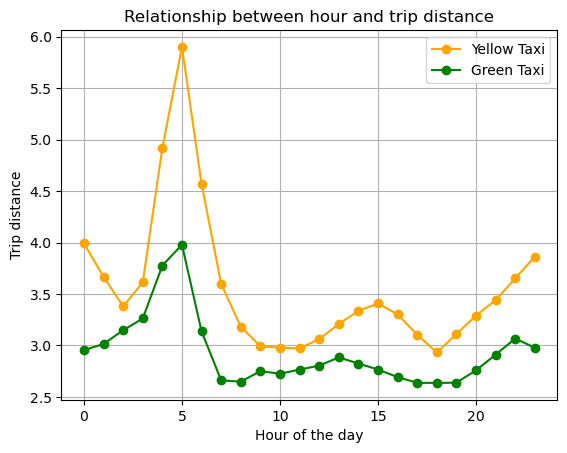

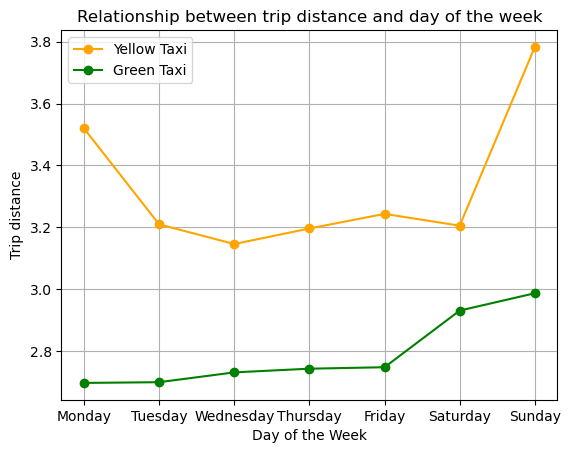

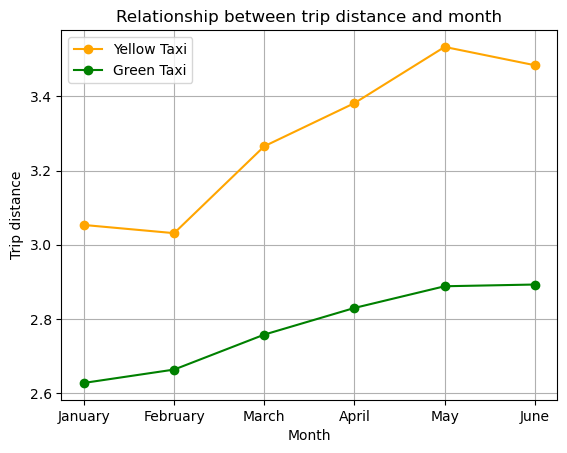

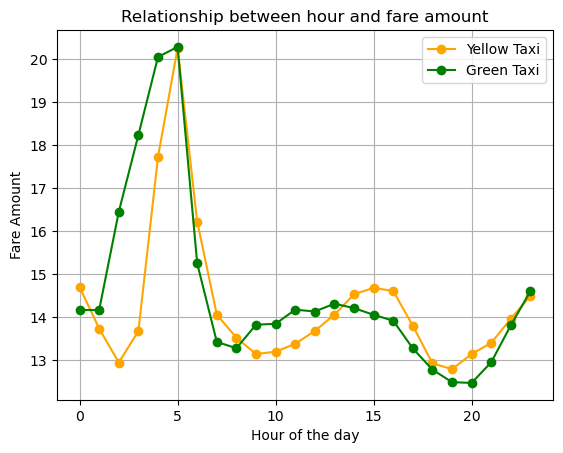

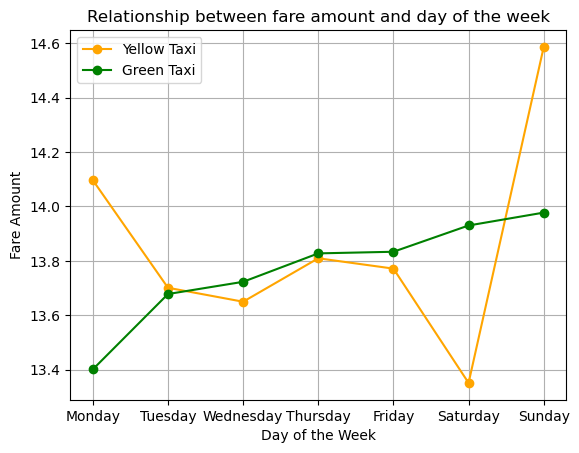

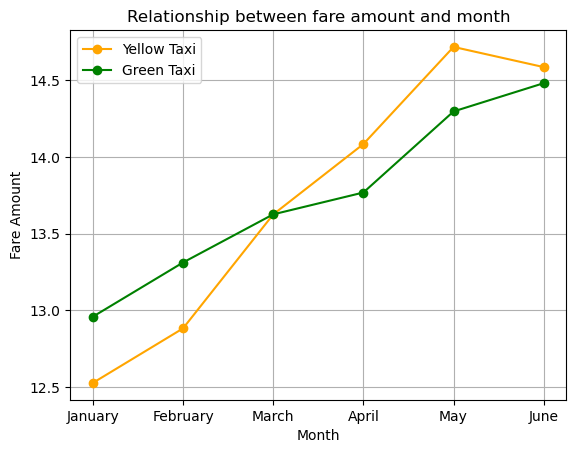

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import PlotTemporalRelationshipBoth
from src.utils import chronological_order_days
from src.utils import chronological_order_month

# The method for plotting these graph are the same for all. 
# 1: Group by the timeformat (hour, day, month), and find the mean for either trip distance or fare. 
# This is done for both the yellow and the green taxis
# 1a: Sort the days and month chronologically using the list from /scr.utils. Only used with days and months
# 2: Plot the graph using the custom line graph function.

#Average distance by hour
average_distance_by_hour_yellow = df_yellow.groupby('Hour')['trip_distance'].mean()
average_distance_by_hour_green = df_green.groupby('Hour')['trip_distance'].mean()
PlotTemporalRelationshipBoth(average_distance_by_hour_yellow, 
                             average_distance_by_hour_green, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Hour of the day', 
                             'Trip distance', 
                             'Relationship between hour and trip distance'
                             )

#Average distance pr. day:
df_yellow_grouped_distance = df_yellow.groupby('DayOfWeek')['trip_distance'].mean()
df_yellow_grouped_distance = df_yellow_grouped_distance.reindex(chronological_order_days)
df_green_grouped_distance = df_green.groupby('DayOfWeek')['trip_distance'].mean()
df_green_grouped_distance = df_green_grouped_distance.reindex(chronological_order_days)
PlotTemporalRelationshipBoth(df_yellow_grouped_distance, 
                             df_green_grouped_distance, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Day of the Week', 
                             'Trip distance', 
                             'Relationship between trip distance and day of the week')

#Average distance pr. Month
df_yellow_grouped_distance = df_yellow.groupby('Month')['trip_distance'].mean()
df_yellow_grouped_distance = df_yellow_grouped_distance.reindex(chronological_order_month)
df_green_grouped_distance = df_green.groupby('Month')['trip_distance'].mean()
df_green_grouped_distance = df_green_grouped_distance.reindex(chronological_order_month)
PlotTemporalRelationshipBoth(df_yellow_grouped_distance, 
                             df_green_grouped_distance, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Month', 
                             'Trip distance', 
                             'Relationship between trip distance and month')


# Average fare pr. hour
average_fare_by_hour_yellow = df_yellow.groupby('Hour')['fare_amount'].mean()
average_fare_by_hour_green = df_green.groupby('Hour')['fare_amount'].mean()
PlotTemporalRelationshipBoth(average_fare_by_hour_yellow, 
                             average_fare_by_hour_green, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Hour of the day', 
                             'Fare Amount', 
                             'Relationship between hour and fare amount'
                             )

# Fare amount and day of the week
df_yellow_grouped = df_yellow.groupby('DayOfWeek')['fare_amount'].mean()
df_yellow_grouped = df_yellow_grouped.reindex(chronological_order_days)
df_green_grouped = df_green.groupby('DayOfWeek')['fare_amount'].mean()
df_green_grouped = df_green_grouped.reindex(chronological_order_days)
PlotTemporalRelationshipBoth(df_yellow_grouped, 
                             df_green_grouped, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Day of the Week', 
                             'Fare Amount', 
                             'Relationship between fare amount and day of the week')

df_yellow_grouped = df_yellow.groupby('Month')['fare_amount'].mean()
df_yellow_grouped = df_yellow_grouped.reindex(chronological_order_month)
df_green_grouped = df_green.groupby('Month')['fare_amount'].mean()
df_green_grouped = df_green_grouped.reindex(chronological_order_month)
PlotTemporalRelationshipBoth(df_yellow_grouped, 
                             df_green_grouped, 
                             'Yellow Taxi', 
                             'Green Taxi', 
                             'orange', 
                             'green', 
                             'Month', 
                             'Fare Amount', 
                             'Relationship between fare amount and month')


## Summary
The fare and distance are greater in the hours where there are not many trips. 
This could mean that the lengthier trips are being conducted by in the morning, and the evening. These trips could be trips to the airport, where the trip distance is greater from the center of the city. 

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

### Task 5: Time-Series Forecasting (Yellow Taxi)

In [15]:
from prophet import Prophet
import pandas as pd

#Orginazing the dataframes for modelling:
# Load the dataframe with pickup dates
df_trips_yellow = df_yellow[['tpep_pickup_datetime']].copy()
df_trips_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_trips_yellow['tpep_pickup_datetime']).dt.date

# Count the number of trips per date and excluding dates that are not from 2022:
df_trips_yellow = df_trips_yellow.groupby('tpep_pickup_datetime').size().reset_index(name='num_trips')
df_trips_yellow = df_trips_yellow[
    pd.to_datetime(df_trips_yellow['tpep_pickup_datetime']).dt.year == 2022
                                ].reset_index(drop = True)
#Renaming columns to prophet standard and dropping outlier values (after 30-06/22)
df_trips_yellow = df_trips_yellow.rename(columns={'tpep_pickup_datetime': 'ds',
                                'num_trips': 'y'
                                })
df_trips_yellow = df_trips_yellow[
    (df_trips_yellow['ds'] >= pd.Timestamp('2022-01-01')) &
    (df_trips_yellow['ds'] <= pd.Timestamp('2022-06-30'))
]

C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\423891095.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_yellow['ds'] >= pd.Timestamp('2022-01-01')) &
C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\423891095.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_yellow['ds'] <= pd.Timestamp('2022-06-30'))


19:50:34 - cmdstanpy - INFO - Chain [1] start processing
19:50:34 - cmdstanpy - INFO - Chain [1] done processing


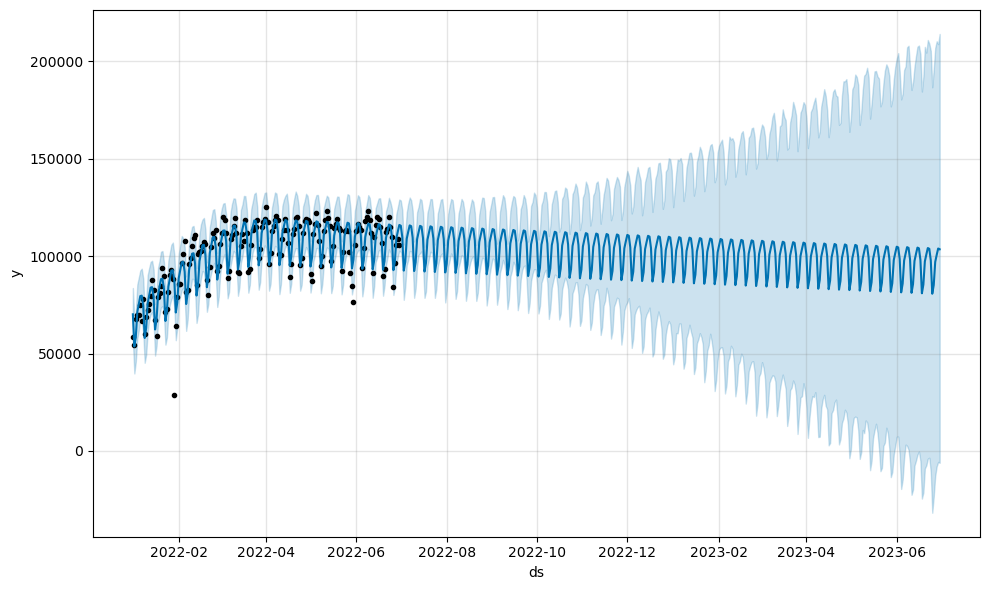

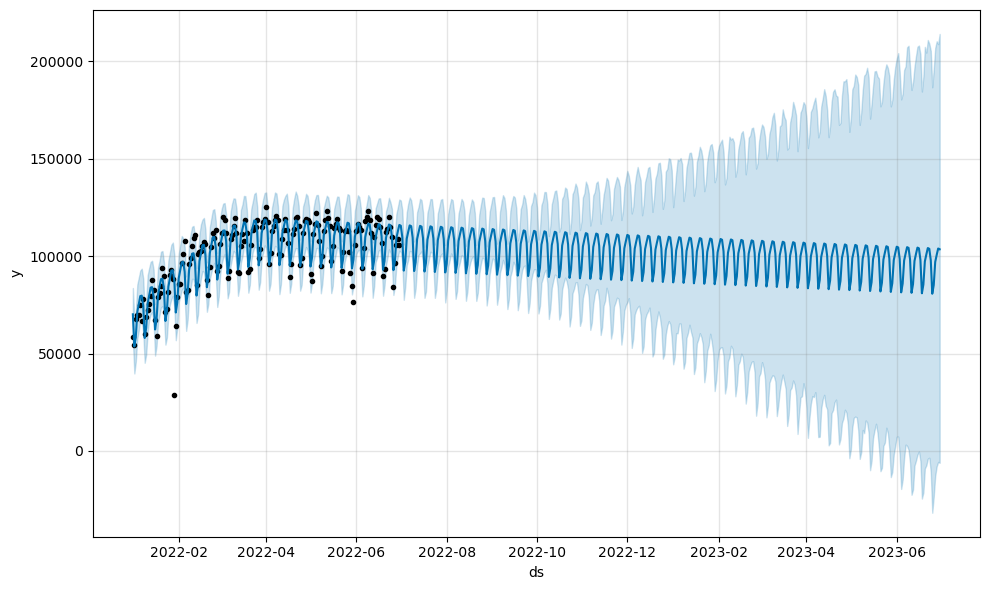

In [16]:
# Initialize model:
my_model = Prophet(interval_width= 0.95)

#Fit to data:
my_model.fit(df_trips_yellow)

#Make dataframe with new dates:
future_dates = my_model.make_future_dataframe(periods = 365, freq = 'D')

#Make forecast with the new dates:
forecast_yellow = my_model.predict(future_dates)

#Plot the forecast:
my_model.plot(forecast_yellow, uncertainty = True)

19:50:41 - cmdstanpy - INFO - Chain [1] start processing
19:50:41 - cmdstanpy - INFO - Chain [1] done processing


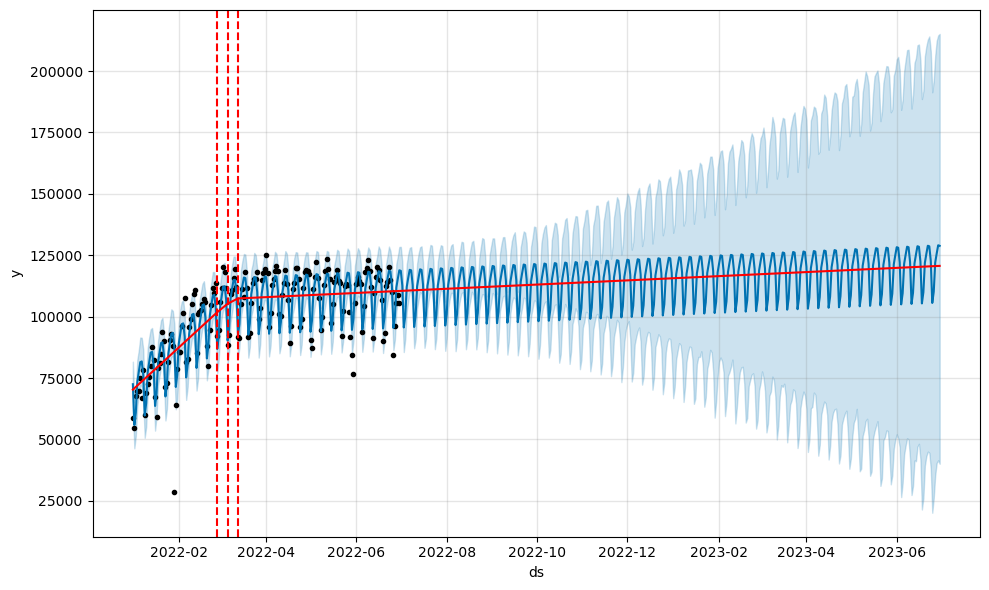

In [17]:
from prophet.plot import add_changepoints_to_plot

# Change the changepoints, changepoint range and scale to better fit the trend. 
# Disable the seasonality
pro_change= Prophet(
    n_changepoints=10, 
    yearly_seasonality=False, 
    changepoint_range=0.4, 
    changepoint_prior_scale=0.015)
# Make new forecast:
forecast_yellow = pro_change.fit(df_trips_yellow).predict(future_dates)
# Plot the new forecast with changepoints:
fig= pro_change.plot(forecast_yellow);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast_yellow)

### Task 5: Time-Series Forecasting (Green Taxi)

In [18]:
from prophet import Prophet
import pandas as pd

#Orginazing the dataframes for modelling:
# Load the dataframe with pickup dates
df_trips_green = df_green[['lpep_pickup_datetime']].copy()
df_trips_green['lpep_pickup_datetime'] = pd.to_datetime(df_trips_green['lpep_pickup_datetime']).dt.date

# Count the number of trips per date and excluding dates that are not from 2022:
df_trips_green = df_trips_green.groupby('lpep_pickup_datetime').size().reset_index(name='num_trips')
df_trips_green = df_trips_green[
    pd.to_datetime(df_trips_green['lpep_pickup_datetime']).dt.year == 2022
                                ].reset_index(drop = True)
#Renaming columns to prophet standard and removing outlier data (after 30-06/22)
df_trips_green = df_trips_green.rename(columns={'lpep_pickup_datetime': 'ds',
                                'num_trips': 'y'
                                })

df_trips_green = df_trips_green[
    (df_trips_green['ds'] >= pd.Timestamp('2022-01-01')) &
    (df_trips_green['ds'] <= pd.Timestamp('2022-06-30'))
]

C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\3783739549.py:20: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_green['ds'] >= pd.Timestamp('2022-01-01')) &
C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\3783739549.py:21: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_green['ds'] <= pd.Timestamp('2022-06-30'))


19:51:05 - cmdstanpy - INFO - Chain [1] start processing
19:51:05 - cmdstanpy - INFO - Chain [1] done processing


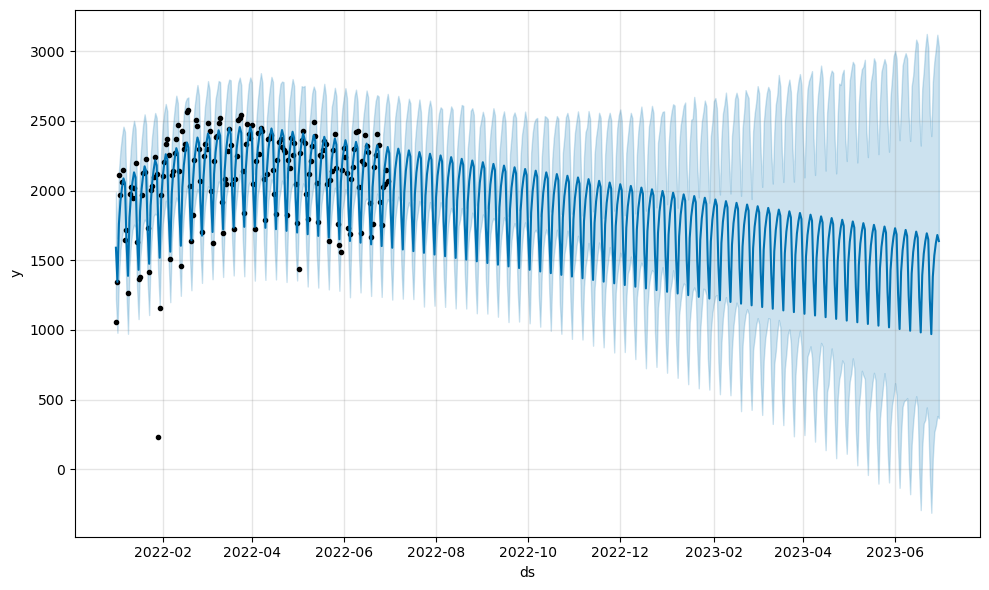

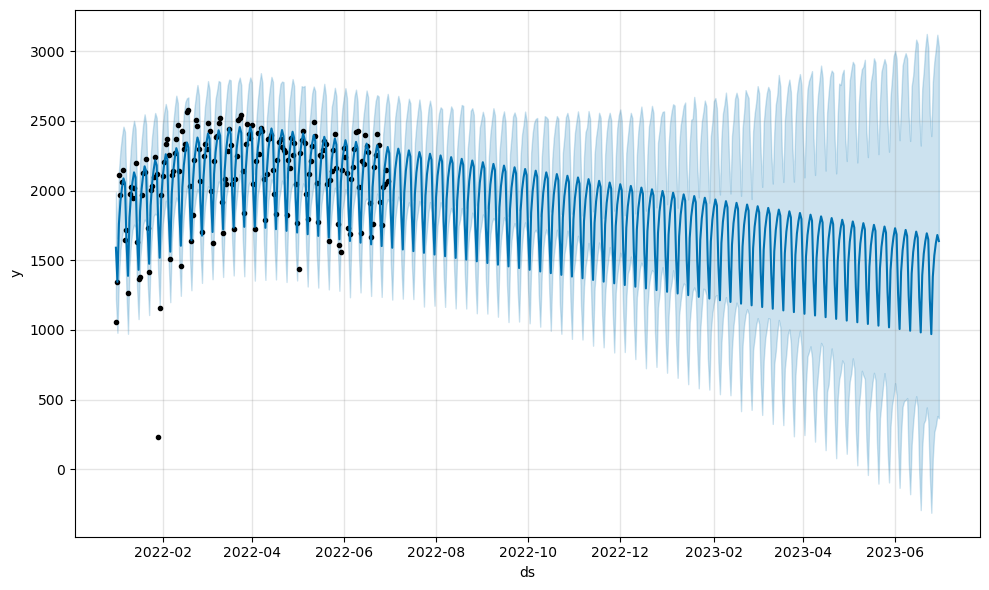

In [19]:
#Initialize model:
my_model = Prophet(interval_width= 0.95)

#Fit model to data:
my_model.fit(df_trips_green)

#Make future dates:
future_dates = my_model.make_future_dataframe(periods = 365, freq = 'D', include_history=True)

#Make forecast:
forecast_green = my_model.predict(future_dates)

#Plot the forecast:
my_model.plot(forecast_green, uncertainty = True)

19:51:09 - cmdstanpy - INFO - Chain [1] start processing
19:51:09 - cmdstanpy - INFO - Chain [1] done processing


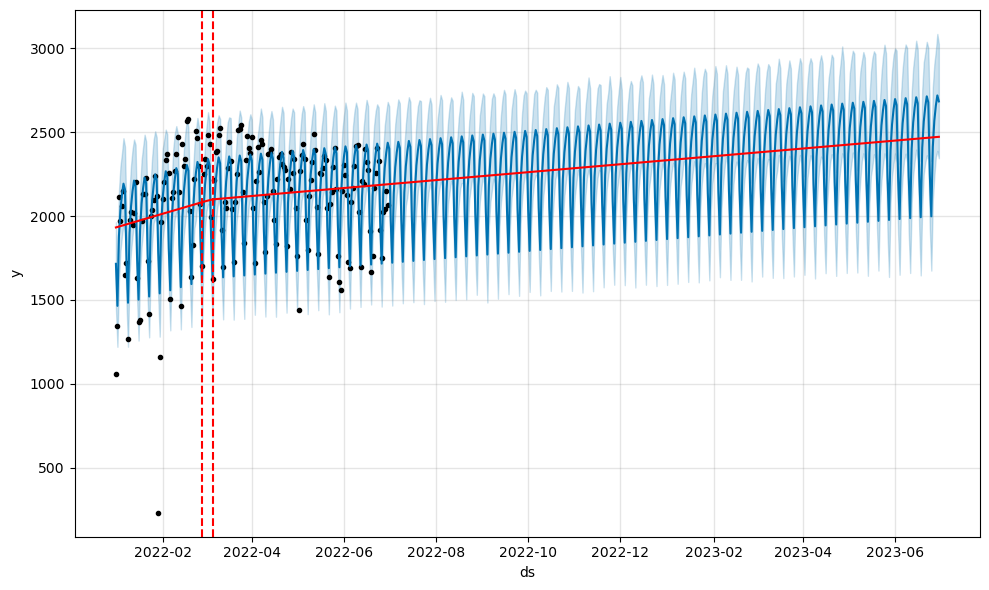

In [20]:
from prophet.plot import add_changepoints_to_plot

# Change the changepoints, scale to better fit the trend. 
# Disable the seasonality
pro_change= Prophet(n_changepoints=20, 
                    yearly_seasonality=False, 
                    changepoint_prior_scale=0.01)
# Make new forecast:
forecast_green = pro_change.fit(df_trips_green).predict(future_dates)

#Plot new forecast:
fig= pro_change.plot(forecast_green);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast_green)

## Summary

It seems that the default forecast shows a significant drop in trips for both the yellow and green taxis. 
This can be corrected using the changepoint method to make the more flexible, and using the seasonality function. Afterwards the forecast shows a increasing amount of trips for both the green and yellow taxis. 

## Validating of model

The validation of the model can be conducted using data from year 2022 and the month that are not in the original dataframe. Ex. We could extract data from July and August, and compare the number of trips that were recorded vs. the amount of trips that the model predicts. 

In [21]:
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['07','08','09']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow_rest = pd.concat(df_yellow_list)
df_green_rest = pd.concat(df_green_list)

In [22]:
#Copies the pickup time from previous dataframe: 
df_trips_yellow_rest = df_yellow_rest[['tpep_pickup_datetime']].copy()
df_trips_yellow_rest['tpep_pickup_datetime'] = pd.to_datetime(df_trips_yellow_rest['tpep_pickup_datetime']).dt.date

# Count the number of trips per date and excluding dates that are not from 2022:
df_trips_yellow_rest = df_trips_yellow_rest.groupby('tpep_pickup_datetime').size().reset_index(name='num_trips')
df_trips_yellow_rest = df_trips_yellow_rest[
    pd.to_datetime(df_trips_yellow_rest['tpep_pickup_datetime']).dt.year == 2022
                                ].reset_index(drop = True)

#Excludes outlier datapoints:
df_trips_yellow_rest = df_trips_yellow_rest[
    (df_trips_yellow_rest['tpep_pickup_datetime'] >= pd.Timestamp('2022-07-01')) &
    (df_trips_yellow_rest['tpep_pickup_datetime'] <= pd.Timestamp('2022-09-30'))
]

C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\252432837.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_yellow_rest['tpep_pickup_datetime'] >= pd.Timestamp('2022-07-01')) &
C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\252432837.py:14: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_yellow_rest['tpep_pickup_datetime'] <= pd.Timestamp('2022-09-30'))


In [26]:

# Convert the 'ds' column in forecast_yellow to datetime type
forecast_yellow['ds'] = pd.to_datetime(forecast_yellow['ds'])

# Convert the 'tpep_pickup_datetime' column in df_yellow_trips_rest to datetime type
df_trips_yellow_rest['tpep_pickup_datetime'] = pd.to_datetime(df_trips_yellow_rest['tpep_pickup_datetime'])

# Merge the dataframes based on the corresponding dates
merged_df_yellow = forecast_yellow.merge(df_trips_yellow_rest, left_on='ds', right_on='tpep_pickup_datetime')

# Calculate the difference between the forecasted trips and the actual trips
merged_df_yellow['difference'] = merged_df_yellow['yhat'] - merged_df_yellow['num_trips']

#FInds the mean difference of the forecast and the actual data:
print(merged_df_yellow['difference'].mean())

#Prints the actual mean trips pr. day for the validations period:
print(df_trips_yellow_rest['num_trips'].mean())




8476.056705144665
103377.61956521739


In [24]:
#Copies the pickup time from previous dataframe: 
df_trips_green_rest = df_green_rest[['lpep_pickup_datetime']].copy()
df_trips_green_rest['lpep_pickup_datetime'] = pd.to_datetime(df_trips_green_rest['lpep_pickup_datetime']).dt.date

# Count the number of trips per date and excluding dates that are not from 2022:
df_trips_green_rest = df_trips_green_rest.groupby('lpep_pickup_datetime').size().reset_index(name='num_trips')
df_trips_green_rest = df_trips_green_rest[
    pd.to_datetime(df_trips_green_rest['lpep_pickup_datetime']).dt.year == 2022
                                ].reset_index(drop = True)

#Excludes outlier datapoints:
df_trips_green_rest = df_trips_green_rest[
    (df_trips_green_rest['lpep_pickup_datetime'] >= pd.Timestamp('2022-07-01')) &
    (df_trips_green_rest['lpep_pickup_datetime'] <= pd.Timestamp('2022-09-30'))
]

C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\3834512075.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_green_rest['lpep_pickup_datetime'] >= pd.Timestamp('2022-07-01')) &
C:\Users\hasse\AppData\Local\Temp\ipykernel_24092\3834512075.py:14: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (df_trips_green_rest['lpep_pickup_datetime'] <= pd.Timestamp('2022-09-30'))


In [27]:

# Convert the 'ds' column in forecast_yellow to datetime type
forecast_green['ds'] = pd.to_datetime(forecast_green['ds'])

# Convert the 'tpep_pickup_datetime' column in df_yellow_trips_rest to datetime type
df_trips_green_rest['lpep_pickup_datetime'] = pd.to_datetime(df_trips_green_rest['lpep_pickup_datetime'])

# Merge the dataframes based on the corresponding dates
merged_df_green = forecast_green.merge(df_trips_green_rest, left_on='ds', right_on='lpep_pickup_datetime')

# Calculate the difference between the forecasted trips and the actual trips
merged_df_green['difference'] = merged_df_green['yhat'] - merged_df_green['num_trips']

# Print the resulting dataframe
merged_df_green

#FInds the mean difference of the forecast and the actual data:
print(merged_df_green['difference'].mean())

#Prints the actual mean trips pr. day for the validations period:
print(df_trips_green_rest['num_trips'].mean())

62.953372517875366
2164.5978260869565


## Summary of Validation

**Yellow taxi forecast**
* The trend originally showed a decline.
* Using changepoints and making the trend less flexible the forecast to the left has been made. 
* Forecast has been validated using actual data from July - September. 
* It shows an average deviation of $\approx$ 8476 trips pr. day, which is a average error of 8,19\%

**Green taxi forecast**
* The trend originally showed a decline.
* Using changepoints and making the trend less flexible the forecast to the left has been made. 
* Forecast has been validated using actual data from July - September. 
* It shows an average deviation of $\approx$ 63 trips pr. day, which is a average error of 2,91\%

## Conclusion


* The yellow taxis conducts far more trips then the green onces, but the distrubtion of both fare, passenger count and trip distance is roughly the same. 
* The data shows that the yellow taxis are primarily based in the center of NYC, and that the green taxis service both the center but also the outskirts of NYC.
* Both of the taxis has their rush hours in the middel of the day, and the amount of trips and distances increase during the night, and early morning. 
* The amount of trips of the yellow taxis descrease in the weekends, but the amount of trips incline during the week and weekends for the green taxis. 
* The forecast shows an increase in amount of trips, but since we do not have data on seasonal correlations, the forecast can be wrong.  

## Limitations and future research ideas

* Too many data entries for Yellow Cabs for our PC's to handle (Hardware)
* There are many outliers in the data set, which needs to be evaluated 
* Weather data could provide insights on if cabs are busier on days with bad weather.
* Improved seasonal data could provide better forecasting for high demand periods.
* Data on trip purpose could provide valuable insights to why and where people are taking cabs.

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.